In [3]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np

In [4]:
df=pd.read_csv('./data/Raw_baseball.csv')

In [5]:
df.tail()

,team,year,month,pov,obp,slg,ba,era,whip
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40
533,10,2022,5,0.385,0.318,0.387,0.251,6.51,1.67


In [6]:
df.columns

Index(['team', 'year', 'month', 'pov', 'obp', 'slg', 'ba', 'era', 'whip'], dtype='object')

In [8]:
#피쳐 변수 설정
feature_names= ['obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(df, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(df, columns=["pov"] )
#상수항 설정
dfX = sm.add_constant(dfX0)


In [9]:
#회귀분석
model_baseball = sm.OLS(dfy, dfX)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    pov   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     108.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.05e-78
Time:                        18:10:53   Log-Likelihood:                 370.04
No. Observations:                 534   AIC:                            -728.1
Df Residuals:                     528   BIC:                            -702.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1741      0.080      2.187      0.0

In [14]:
this_year_score.drop(['이름'],  axis=1)

,team,OBP,SLG,BA,ERA,WHIP,POV
0,9,0.350,0.409,0.269,4.03,1.34,0.542
1,4,0.340,0.392,0.264,3.78,1.36,0.567
2,5,0.326,0.365,0.246,3.49,1.26,0.600
3,6,0.330,0.370,0.249,3.56,1.21,0.661
4,2,0.331,0.357,0.256,4.12,1.42,0.483
5,1,0.326,0.352,0.247,3.58,1.24,0.475
6,7,0.320,0.363,0.248,3.85,1.36,0.383
7,3,0.321,0.365,0.260,3.86,1.39,0.483
8,10,0.317,0.355,0.242,5.30,1.53,0.361
9,8,0.313,0.366,0.254,4.03,1.36,0.448


In [43]:
this_year_score.tail()

,team,OBP,SLG,BA,ERA,WHIP,POV,이름
5,1,0.326,0.352,0.247,3.58,1.24,0.475,kt
6,7,0.320,0.363,0.248,3.85,1.36,0.383,nc
7,3,0.321,0.365,0.260,3.86,1.39,0.483,삼성
8,10,0.317,0.355,0.242,5.30,1.53,0.361,한화
9,8,0.313,0.366,0.254,4.03,1.36,0.448,롯데


In [44]:
this_data=this_year_score.drop('이름', axis=1)

In [17]:
this_data.drop(['team','POV'], axis=1)

,OBP,SLG,BA,ERA,WHIP
0,0.350,0.409,0.269,4.03,1.34
1,0.340,0.392,0.264,3.78,1.36
2,0.326,0.365,0.246,3.49,1.26
3,0.330,0.370,0.249,3.56,1.21
4,0.331,0.357,0.256,4.12,1.42
5,0.326,0.352,0.247,3.58,1.24
6,0.320,0.363,0.248,3.85,1.36
7,0.321,0.365,0.260,3.86,1.39
8,0.317,0.355,0.242,5.30,1.53
9,0.313,0.366,0.254,4.03,1.36


In [19]:
this_data = this_data.drop('team', axis=1)

In [20]:
this_data = this_data.drop('POV', axis=1)

In [23]:
pov22=[]
pov22_pred=[]
pov22_team=[]
for idx, row in this_data.iterrows():
    a= result_baseball_ols.predict(row)
    print('예측값: ', round( a[0],3), end='    ')
    pov22_pred.append(round( a[0],3))
    b= this_year_score['POV'][idx]
    print('실제값: ',b)
    pov22.append(b)
    c=idx
    pov22_team.append(c)

예측값:  0.57    실제값:  0.542
예측값:  0.556    실제값:  0.567
예측값:  0.55    실제값:  0.6
예측값:  0.557    실제값:  0.661
예측값:  0.472    실제값:  0.483
예측값:  0.526    실제값:  0.475
예측값:  0.497    실제값:  0.383
예측값:  0.481    실제값:  0.483
예측값:  0.356    실제값:  0.361
예측값:  0.463    실제값:  0.448


In [24]:
pov22,pov22_pred

([0.542, 0.567, 0.6, 0.661, 0.483, 0.475, 0.383, 0.483, 0.361, 0.448],
 [0.57, 0.556, 0.55, 0.557, 0.472, 0.526, 0.497, 0.481, 0.356, 0.463])

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

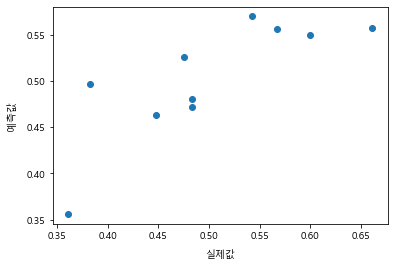

In [70]:
scatter =plt.scatter(pov22, pov22_pred) 
plt.xlabel('실제값',labelpad=10)
plt.ylabel('예측값', labelpad=10)
plt.figure